In this notebook, i will rewrite the page in the below link:
http://www.nltk.org/book/ch05.html

# 5 Categorizing and Tagging Words


---
Back in elementary school you learnt the difference between nouns(library), verbs(to read), adjectives(readable), and adverbs(slowly). These "word classes" are not just the idle invention of grammarians, but are useful categories for many language processing tasks. As we will see, they arise from simple analysis of the distribution of words in text.</br>
The goal of this chapter is to answer the following questions:</br>

- What are lexical categories and how are they used in natural language processing?
- What is a good Python data structure for storing words and their categories?
- How can we automatically tag each word of a text with its word class? </br>

Along the way, we'll cover some fundamental techniques in NLP, including sequence labeling, n-gram models, backoff, and evaluation. These techniques are useful in many areas, and tagging gives us a simple context in which to present them. We will also see how tagging is the second step in the typical NLP pipeline, following tokenization.

The process of classifying words into their<b> parts of speech</b> and labeling them accordingly is known as <b>part-of-speech tagging</b>, <b>POS-tagging</b>, or simply <b>tagging</b>. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

---


A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word (don't forget to import nltk):

In [ ]:
# install nltk

In [4]:
!pip install --upgrade pip
!pip install nltk
import nltk
nltk.download()

Requirement already up-to-date: pip in /opt/conda/lib/python3.5/site-packages
NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /home/jovyan/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /home/jovyan/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to
       |     /home/jovyan/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /home/jovyan/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /home/jovyan/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat 

True

## 1. Using a Tagger

In [5]:
# import needed libraries 
import nltk

In [6]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

<mark>Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective</mark>

<b>Note:</b> </br>

NLTK provides documentation for each tag, which can be queried using the tag, e.g. nltk.help.upenn_tagset('RB'), or a regular expression, e.g. nltk.help.upenn_tagset('NN.*'). Some corpora have README files with tagset documentation, see nltk.corpus.???.readme(), substituting in the name of the corpus.

In [7]:
#example:
nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


Let's look at another example, this time including some homonyms(a homonym is one of a group of similar words that have different meanings, depending on when they're used)

In [8]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

<mark>Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). E.g. refUSE is a verb meaning "deny," while REFuse is a noun meaning "trash" (i.e. they are not homophones). Thus, we need to know which word is being used in order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS-tagging.)</mark>

<b>Note</b>:</br>

Your Turn: Many words, like ski and race, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.

In [9]:
text = nltk.word_tokenize("I will use my ski to ski")
nltk.pos_tag(text)

[('I', 'PRP'),
 ('will', 'MD'),
 ('use', 'VB'),
 ('my', 'PRP$'),
 ('ski', 'NN'),
 ('to', 'TO'),
 ('ski', 'VB')]

In [10]:
text = nltk.word_tokenize("Duraing the race,  I'll race many athletes from all continents")
nltk.pos_tag(text)

[('Duraing', 'VBG'),
 ('the', 'DT'),
 ('race', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ("'ll", 'MD'),
 ('race', 'NN'),
 ('many', 'JJ'),
 ('athletes', 'NNS'),
 ('from', 'IN'),
 ('all', 'DT'),
 ('continents', 'NNS')]

Lexical categories like "noun" and part-of-speech tags like NN seem to have their uses, but the details will be obscure to many readers. You might wonder what justification there is for introducing this extra level of information. Many of these categories arise from superficial analysis the distribution of words in text. Consider the following analysis involving woman (a noun), bought (a verb), over (a preposition), and the (a determiner). The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2.

In [11]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man day time year car moment world family house country boy child job
state girl war way place work room


In [12]:
text.similar('bought')

made done put said found seen had given left heard set brought been
got was in told felt called took


In [13]:
text.similar('over')


in on to of and for with from at by that into as up out down through
is all about


In [14]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


<mark>Observe that searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds prepositions; searching for the finds several determiners. A tagger can correctly identify the tags on these words in the context of a sentence, e.g. The woman bought over $150,000 worth of clothes.</br>

<mark>A tagger can also model our knowledge of unknown words, e.g. we can guess that scrobbling is probably a verb, with the root scrobble, and likely to occur in contexts like he was scrobbling.</mark>

## 2. Tagged Corpora

### 2.1   Representing Tagged Tokens

By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag. We can create one of these special tuples from the standard string representation of a tagged token, using the function str2tuple():

In [15]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token, tagged_token[0],tagged_token[1]

(('fly', 'NN'), 'fly', 'NN')

We can construct a list of tagged tokens directly from a string. The first step is to tokenize the string to access the individual word/tag strings, and then to convert each of these into a tuple (using str2tuple()).



In [16]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''

In [17]:
type(sent)

str

In [18]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

### 2.2 Reading ragged Corpora

In [19]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [20]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Whenever a corpus contains tagged text, the NLTK corpus interface will have a tagged_words() method. Here are some more examples, again using the output format illustrated for the Brown Corpus:



In [21]:
print(nltk.corpus.nps_chat.tagged_words())


[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [22]:
nltk.corpus.conll2000.tagged_words()


[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [23]:
nltk.corpus.treebank.tagged_words()


[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

Tagged corpora for several other languages are distributed with NLTK, including Chinese, Hindi, Portuguese, Spanish, Dutch and Catalan. These usually contain non-ASCII text, and Python always displays this in hexadecimal when printing a larger structure such as a list.



In [24]:
print(nltk.corpus.sinica_treebank.tagged_words())
print(nltk.corpus.indian.tagged_words())
print(nltk.corpus.mac_morpho.tagged_words())
print(nltk.corpus.conll2002.tagged_words())
print(nltk.corpus.cess_cat.tagged_words())


[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]
[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]
[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]
[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]
[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]


In [25]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [26]:
#text.tokens
len([w for w in text.tokens  if w.endswith('s')]) #" gives all words that ends with 's'"

128678

### 2.3 A Universal Part-of-Speech Tagset

Tagged corpora use many different conventions for tagging words. To help us get started, we will be looking at a simplified tagset (shown in 2.1).



![title](table.JPG)


Let's see which of these tags are the most common in the news category of the Brown corpus:



In [27]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')  # put categories to Noun if you want all categories
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

<b>Note:</b>

Your Turn: Plot the above frequency distribution using tag_fd.plot(cumulative=True). What percentage of words are tagged using the first five tags of the above list?

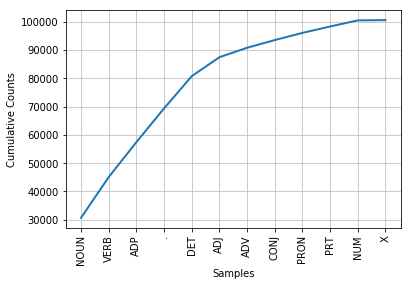

In [28]:
tag_fd.plot(cumulative=True)

In [29]:
#percentage of words tagged using the first five tags:
print(len(brown.words()))
print(len (brown.tagged_words(categories='news')))
print(80000/len(brown.tagged_words(categories='news')))
## 79.55%

1161192
100554
0.7955924180042564


In [30]:
for category in brown.categories():
    print(category)


adventure
belles_lettres
editorial
fiction
government
hobbies
humor
learned
lore
mystery
news
religion
reviews
romance
science_fiction


### 2.4   Nouns

Nouns generally refer to people, places, things, or concepts, e.g.: woman, Scotland, book, intelligence. Nouns can appear after determiners and adjectives, and can be the subject or object of the verb, as shown in 2.2.

![title](table2.JPG)


The simplified noun tags are N for common nouns like book, and NP for proper nouns like Scotland.</br>

Let's inspect some tagged text to see what parts of speech occur before a noun, with the most frequent ones first. To begin with, we construct a list of bigrams whose members are themselves word-tag pairs such as (('The', 'DET'), ('Fulton', 'NP')) and  (('Fulton', 'NP'), ('County', 'N')). Then we construct a FreqDist from the tag parts of the bigrams.

In [50]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)  # each tag with its occurence count
fdist,[tag for (tag, _) in fdist.most_common()]   # fdist in decreasing order


(FreqDist({'.': 2796,
           'ADJ': 4761,
           'ADP': 3781,
           'ADV': 186,
           'CONJ': 938,
           'DET': 7373,
           'NOUN': 7959,
           'NUM': 894,
           'PRON': 19,
           'PRT': 94,
           'VERB': 1842,
           'X': 11}),
 ['NOUN',
  'DET',
  'ADJ',
  'ADP',
  '.',
  'VERB',
  'CONJ',
  'NUM',
  'ADV',
  'PRT',
  'PRON',
  'X'])

### 2.5   Verbs

Verbs are words that describe events and actions, e.g. fall, eat in 2.3. In the context of a sentence, verbs typically express a relation involving the referents of one or more noun phrases.

![](table3.JPG)

What are the most common verbs in news text? Let's sort all the verbs by frequency:

In [65]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB' ]
#word_tag_fd  delete comment to see result 

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'help',
 'sold',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'being',
 'compared',
 'fell',
 'began',
 'based',
 'closed',
 'used',
 "'re",
 'want',
 'see',
 'yield',
 'took',
 'set',
 'priced',
 'offered',
 'approved',
 'noted',
 'cut',
 'come',
 'ended',
 'become',
 'increased',
 'think',
 'found',
 'named',
 'proposed',
 'growing',
 'go',
 'declined',
 'trying',
 'received',
 'give',
 'came',
 'use',
 'held',
 'put',
 'called',
 'continue',
 'making',
 'raise',
 'designed',
 'estimated',
 'paid',
 'going',
 'wo',
 'expects',
 'seeking',
 'plans',
 'must',
 'fined',
 'trading',
 'saying',
 'acquired',
 'increasing',
 'owns',
 'gained',
 'got',
 'seek',
 'reached',
 'included',
 'became',
 'filed',
 'an

In [58]:
#how many words are plural
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
L=[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'NOUN' ]
[w for w in L if w.endswith('s')]

['years',
 'shares',
 'prices',
 'business',
 'cents',
 'funds',
 'stocks',
 'investors',
 'futures',
 'companies',
 'bonds',
 'sales',
 'months',
 'markets',
 'days',
 'banks',
 'rates',
 'traders',
 'officials',
 'Congress',
 'managers',
 'earnings',
 'issues',
 'firms',
 'securities',
 'loss',
 'products',
 'students',
 'analysts',
 'points',
 'notes',
 'operations',
 'problems',
 'orders',
 'Securities',
 'members',
 'services',
 'appropriations',
 'news',
 'contracts',
 'programs',
 'customers',
 'weeks',
 'James',
 'costs',
 'cases',
 'questions',
 'gains',
 'ringers',
 'dividends',
 'transactions',
 'payments',
 'countries',
 'results',
 'workers',
 'Jones',
 'rights',
 'employees',
 'shareholders',
 'cars',
 'executives',
 'fees',
 'trades',
 'bells',
 'Sales',
 'bills',
 'Express',
 'talks',
 'institutions',
 'clients',
 'terms',
 'Industries',
 'conditions',
 'assets',
 'dollars',
 'investments',
 'times',
 'farmers',
 'Texas',
 'materials',
 'violations',
 'Containers',
 'te

Note that the items being counted in the frequency distribution are word-tag pairs. Since words and tags are paired, we can treat the word as a condition and the tag as an event, and initialize a conditional frequency distribution with a list of condition-event pairs. This lets us see a frequency-ordered list of tags given a word:



In [72]:
cfd1 = nltk.ConditionalFreqDist(wsj)
print(cfd1['yield'].most_common())
print(cfd1['cut'].most_common())


[('VERB', 28), ('NOUN', 20)]
[('VERB', 25), ('NOUN', 3)]


We can reverse the order of the pairs, so that the tags are the conditions, and the words are the events. Now we can see likely words for a given tag. We will do this for the WSJ tagset rather than the universal tagset:

In [75]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])
#cfd2

['organized',
 'opposed',
 'terminated',
 'come',
 'continued',
 'recruited',
 'led',
 'fined',
 'raised',
 'attempted',
 'estimated',
 'converted',
 'fattened',
 'bribed',
 'ratified',
 'inflated',
 'examined',
 'characterized',
 'awarded',
 'repaired',
 'stated',
 'equipped',
 'supported',
 'held',
 'kicked',
 'prompted',
 'mortgaged',
 'controlled',
 'tested',
 'chastised',
 'averted',
 'topped',
 'zoomed',
 'customized',
 'plunged',
 'boosted',
 'cultivated',
 'declared',
 'limited',
 'assured',
 'accounted',
 'failed',
 'prosecuted',
 'armed',
 'rigged',
 'sent',
 'served',
 'voted',
 'handled',
 'exposed',
 'laid',
 'set',
 'covered',
 'magnified',
 'named',
 'charged',
 'endorsed',
 'listed',
 'enacted',
 'looked',
 'judged',
 'subdued',
 'knitted',
 'concerned',
 'specialized',
 'diagnosed',
 'documented',
 'echoed',
 'created',
 'cut',
 'switched',
 'referred',
 'midsized',
 'convicted',
 'stimulated',
 'spread',
 'learned',
 'allowed',
 'exercised',
 'corrected',
 'presented'

To clarify the distinction between VBD (past tense) and VBN (past participle), let's find words which can be both VBD and VBN, and see some surrounding text:



In [85]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]


[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [84]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

<mark>In this case, we see that the past participle of kicked is preceded by a form of the auxiliary verb have. Is this generally true?</mark>